**Example hypercube and hypersphere in 2D**

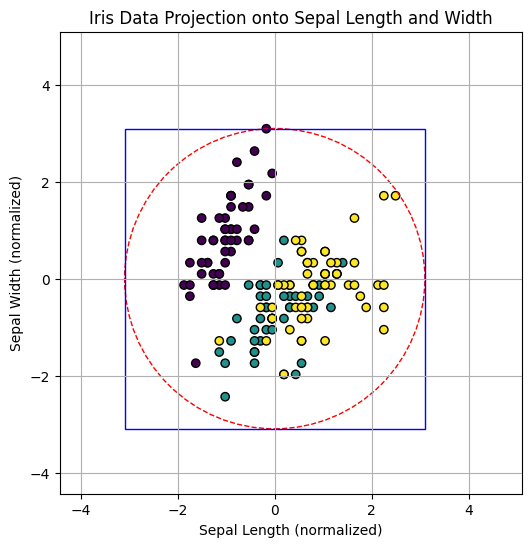

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from numpy.linalg import norm
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Project onto sepal length and sepal width
sepal_length = X_scaled[:, 0]  # First column (sepal length)
sepal_width = X_scaled[:, 1]   # Second column (sepal width)
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sepal_length, sepal_width, c=y, cmap='viridis', edgecolor='k') 
# more info on color maps https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.xlabel('Sepal Length (normalized)')
plt.ylabel('Sepal Width (normalized)')
plt.title('Iris Data Projection onto Sepal Length and Width')

max_attribute_val = max(max(sepal_length), max(sepal_width))
# print(max_attribute_val)
projected_data = np.column_stack((sepal_length, sepal_width))
norm_vals_list = list(map(norm, projected_data))
max_norm = max(norm_vals_list)

# Draw the 2D hypersphere (circle)
circle = plt.Circle((0, 0), max_norm, color='red', fill=False, linestyle='--')
plt.gca().add_artist(circle) #gca gets the current axes, and adds the circle to it.

square = plt.Rectangle((-max_attribute_val, -max_attribute_val), 2*max_attribute_val, 2*max_attribute_val, color='blue', fill=False) #A square centered at 0,0, with side length 2.
plt.gca().add_artist(square)

# Set axis limits to make sure the circle is visible
plt.xlim(min(sepal_length.min(), sepal_width.min())-2, max(sepal_length.max(), sepal_width.max())+2)
plt.ylim(min(sepal_length.min(), sepal_width.min())-2, max(sepal_length.max(), sepal_width.max())+2)
plt.gca().set_aspect('equal', adjustable='box') # this is needed to make sure that scales in x and y axis are equal.

plt.grid(True)
plt.show()


**Volume of a Unit (radius 1) Hypersphere vs. Number of Dimensions**

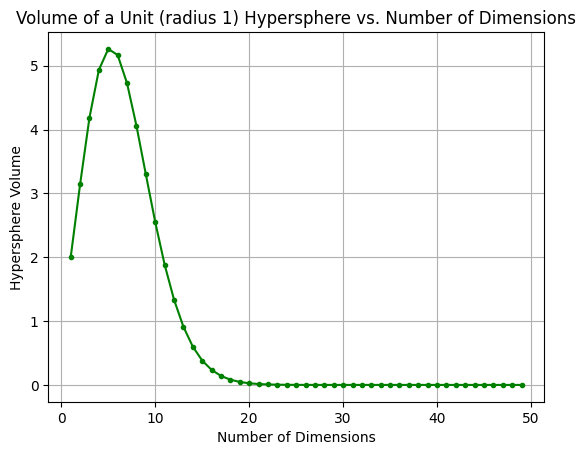

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Dimensions
dimensions = np.arange(1, 50)

# Volume of a unit hypersphere: pi^(n/2) / Gamma((n/2) + 1)
volumes = (np.pi ** (dimensions / 2)) / gamma((dimensions / 2) + 1)

# Plot
# plt.figure(figsize=(8, 6))
plt.plot(dimensions, volumes, marker='.', linestyle='-', color='g')
plt.title('Volume of a Unit (radius 1) Hypersphere vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Hypersphere Volume')
plt.grid(True)
plt.show()

**Ratio of Unit Hypersphere Volume to Hypercube Volume vs. Dimensions**

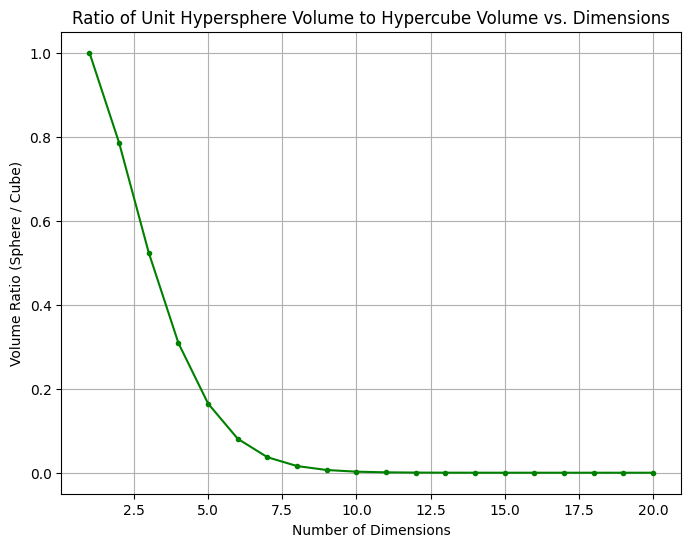

In [80]:
# Ratio of hypersphere volume to hypercube volume
dimensions = np.arange(1, 21)
volumes_sphere = (np.pi ** (dimensions / 2)) / gamma((dimensions / 2) + 1)
volumes_cube = 2 ** dimensions

# Ratio
ratios = volumes_sphere / volumes_cube

# Plot
plt.figure(figsize=(8, 6))
plt.plot(dimensions, ratios, marker='.', linestyle='-', color='green')
plt.title('Ratio of Unit Hypersphere Volume to Hypercube Volume vs. Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Volume Ratio (Sphere / Cube)')
plt.grid(True)
plt.show()

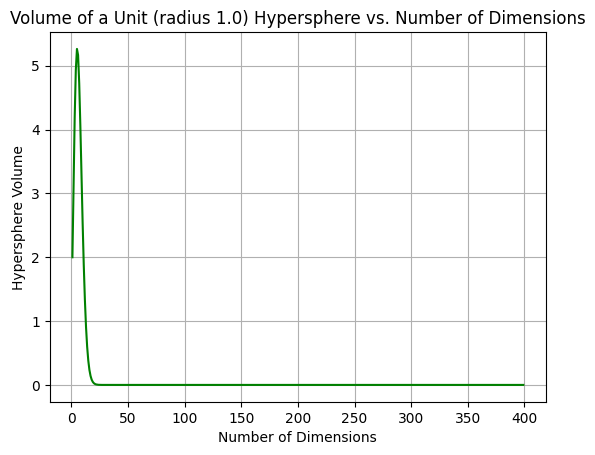

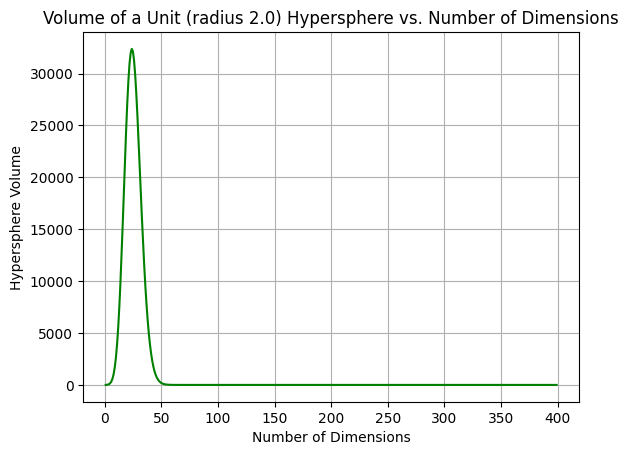

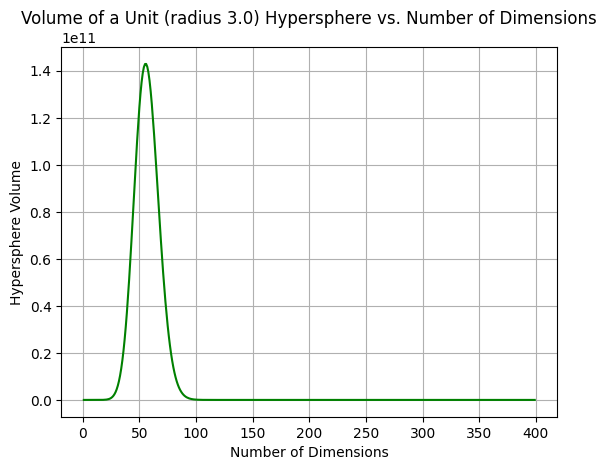

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Dimensions
radiuss = [np.float64(1),np.float64(2),np.float64(3)]
for radius in radiuss:
    dimensions = np.arange(1, 400)
    # radius = np.float64(3)
    # Volume of a unit hypersphere: pi^(n/2) / Gamma((n/2) + 1)
    volumes = radius**dimensions * (np.pi ** (dimensions / 2)) / gamma((dimensions / 2) + 1)
    # print(volumes)
    # Plot
    # plt.figure(figsize=(8, 6))
    plt.plot(dimensions, volumes, linestyle='-', color='g')
    plt.title(f'Volume of a Unit (radius {radius}) Hypersphere vs. Number of Dimensions')
    plt.xlabel('Number of Dimensions')
    plt.ylabel('Hypersphere Volume')
    plt.grid(True)
    plt.show()

**Ratio of Hypershell to Hypershphere example**

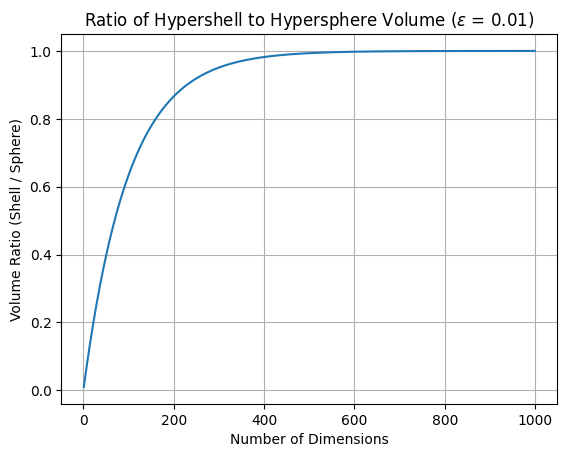

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def volume_ratio(n, radius, epsilon):
    """Calculates the ratio of hypershell volume to hypersphere volume."""
    return 1 - (1 - epsilon/radius)**n

# Parameters
epsilon = 0.01  # Width of the hypershell
dimensions = np.arange(1, 1000)  # Dimensions from 1 to 50

# Calculate the ratios
ratios = [volume_ratio(n, 1, epsilon) for n in dimensions]

# Plotting
plt.plot(dimensions, ratios)
plt.xlabel('Number of Dimensions')
plt.ylabel('Volume Ratio (Shell / Sphere)')
plt.title(f'Ratio of Hypershell to Hypersphere Volume ($\epsilon$ = {epsilon})')
plt.grid(True)
plt.show()

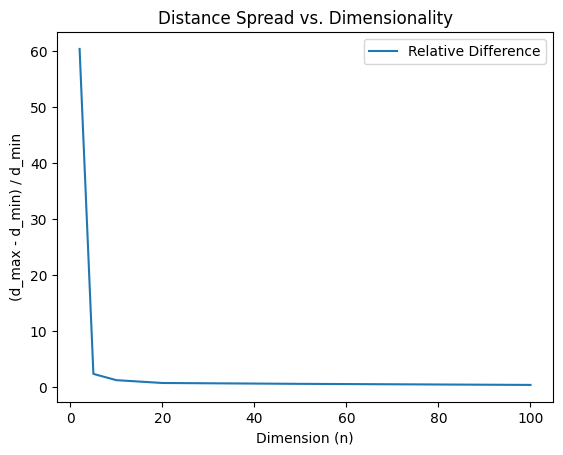

In [6]:
import numpy as np
import matplotlib.pyplot as plt

dimensions = [2, 5, 10, 20, 50, 100]
m = 100
results = []

for n in dimensions:
    # Generate m points in n dimensions
    points = np.random.uniform(0, 1, (m, n))
    p = points[0]  # Reference point
    distances = np.sqrt(((points[1:] - p) ** 2).sum(axis=1))
    d_min = np.min(distances)
    d_max = np.max(distances)
    relative_diff = (d_max - d_min) / d_min
    results.append((n, d_min, d_max, relative_diff))

# Plot
n_vals, d_mins, d_maxs, rel_diffs = zip(*results)
plt.plot(n_vals, rel_diffs, label="Relative Difference")
plt.xlabel("Dimension (n)")
plt.ylabel("(d_max - d_min) / d_min")
plt.title("Distance Spread vs. Dimensionality")
plt.legend()
plt.show()

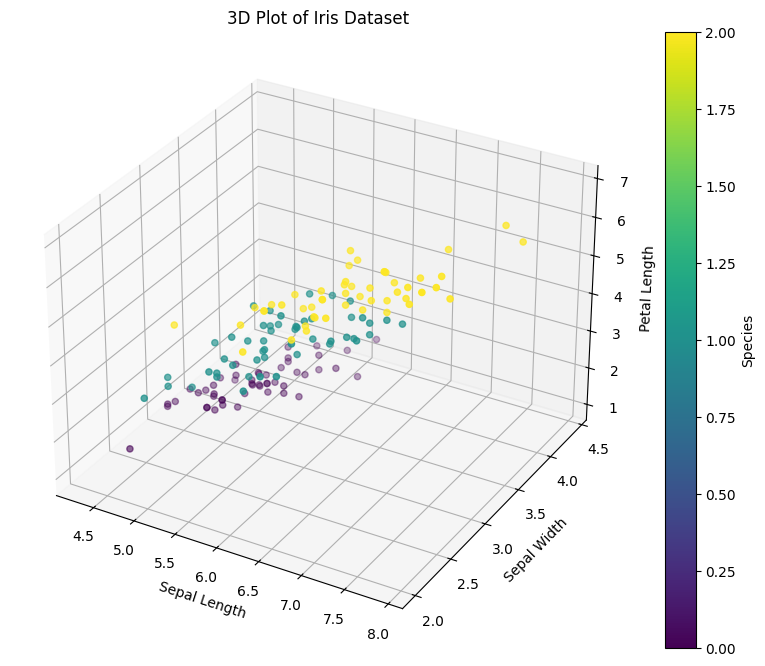

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose three features for the 3D plot (e.g., sepal length, sepal width, petal length)
x_values = X[:, 0]  # Sepal length
y_values = X[:, 1]  # Sepal width
z_values = X[:, 2]  # Petal length

# Scatter plot with color coding for species
scatter = ax.scatter(x_values, y_values, z_values, c=y, cmap='viridis', s=20)

# Set labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Plot of Iris Dataset')

# Add a colorbar
plt.colorbar(scatter, ax=ax, label='Species')

plt.show()